In [1]:
import numpy as np
import pandas as pd

import pandas as pd
pd.set_option('display.max_rows', 20)

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns

import sys
sys.path.append("../")

import Orange


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
file_name = "ucr_accuracy-sonic.csv"
df = pd.read_csv(f"../data/{file_name}")

file_name = "ucr_runtime-sonic.csv"
df_rt = pd.read_csv(f"../data/{file_name}")


df.Classifier = df.Classifier.replace({"WEASEL (dilation)": "WEASEL 2.0"})
df_rt.Classifier = df_rt.Classifier.replace({"WEASEL (dilation)": "WEASEL 2.0"})


mapping = {"Arsenal": "Arsenal (K)",
           "BOSS": "BOSS (D)",
           "HC1": "HC1 (H)",
           "HC2": "HC2 (H)",
           "Hydra": "Hydra (K/D)",
           "InceptionTime": "InceptionTime (DL)",
           "MiniRocket": "MiniRocket (K)",
           "MrSQM_SFA_k5": "MrSQM_SFA_k5 (S/D)",
           "MultiRocket": "MultiRocket (K)",
           "R_DST": "R_DST (S)",
           "Rocket": "Rocket (K)",
           "TDE": "TDE (D)",
           "TS-CHIEF": "TS-CHIEF (H)",
           "WEASEL": "WEASEL (D)",
           "WEASEL 2.0": "WEASEL 2.0 (D)",
           "cBOSS":  "cBOSS (D)",}

for key in mapping:
    df.Classifier = df.Classifier.replace({key: mapping[key]})
    df_rt.Classifier = df_rt.Classifier.replace({key: mapping[key]})

In [3]:
pd.set_option('display.max_rows', 500)
df_pivot = df.pivot(index="Dataset", columns=["Classifier"], values=["Accuracy"])  # .iloc[:-5]

df_pivot.reset_index(drop=True)
df_pivot.columns = df_pivot.columns.get_level_values(1)
#df_pivot.dropna(inplace=True)
df_pivot = df_pivot.round(4)
# print(df_pivot.shape)
display(df_pivot)
df_pivot.describe()

Classifier,Arsenal (K),BOSS (D),HC1 (H),HC2 (H),Hydra (K/D),InceptionTime (DL),MiniRocket (K),MrSQM_SFA_k5 (S/D),MultiRocket (K),R_DST (S),Rocket (K),TDE (D),TS-CHIEF (H),WEASEL (D),WEASEL 2.0 (D),cBOSS (D)
Dataset,,,,,,,,,,,,,,,,
ACSF1,0.8900,0.9000,0.8500,0.9300,0.8600,0.8267,0.9200,0.9100,0.8900,0.9300,0.8800,0.9100,0.8070,0.8700,0.9600,0.8900
Adiac,0.7775,0.7724,0.7962,0.8080,0.7801,0.8221,0.8414,0.8133,0.8363,0.7289,0.7877,0.7801,0.7797,0.8082,0.8440,0.7903
ArrowHead,0.8171,0.8286,0.8760,0.8800,0.8114,0.8804,0.8629,0.7886,0.8629,0.8571,0.8171,0.8800,0.8811,0.8743,0.8571,0.8171
BME,1.0000,0.7667,0.9822,1.0000,1.0000,0.9964,1.0000,0.8133,1.0000,0.9933,1.0000,0.9000,0.9964,0.9133,0.9800,0.6667
Beef,0.8333,0.7667,0.7356,0.8330,0.8667,0.6822,0.8667,0.8000,0.7667,0.8333,0.8333,0.8000,0.6322,0.8333,0.8333,0.6667
BeetleFly,0.9000,0.9500,0.9633,0.9500,0.9500,0.8933,0.9000,0.9500,0.9000,0.9500,0.9000,0.9500,0.9583,0.7500,0.9500,0.9500
BirdChicken,0.9000,1.0000,0.9400,0.9000,0.9000,0.9517,0.9000,0.9000,0.9000,0.9000,0.9000,0.9500,0.9633,0.9000,0.9000,0.9500
CBF,1.0000,0.9989,0.9983,0.9990,0.9911,0.9961,0.9989,0.9989,0.9956,0.9933,1.0000,0.9956,0.9984,0.9933,0.9800,1.0000
Car,0.9167,0.8167,0.8689,0.9000,0.9167,0.9011,0.9167,0.8500,0.9167,0.9167,0.9000,0.8333,0.8789,0.9167,0.9167,0.8333


Classifier,Arsenal (K),BOSS (D),HC1 (H),HC2 (H),Hydra (K/D),InceptionTime (DL),MiniRocket (K),MrSQM_SFA_k5 (S/D),MultiRocket (K),R_DST (S),Rocket (K),TDE (D),TS-CHIEF (H),WEASEL (D),WEASEL 2.0 (D),cBOSS (D)
count,112.000000,114.000000,108.000000,114.000000,114.000000,108.000000,114.000000,114.000000,113.000000,114.000000,114.000000,114.000000,108.000000,114.000000,113.000000,114.000000
mean,0.854118,0.811719,0.878175,0.875251,0.853139,0.871480,0.860854,0.850084,0.868371,0.863196,0.855850,0.839880,0.875725,0.829841,0.863642,0.813467
std,0.160257,0.170800,0.123883,0.133586,0.152206,0.129533,0.142642,0.141656,0.137853,0.138988,0.158449,0.149276,0.129230,0.164447,0.144722,0.166122
min,0.086500,0.216800,0.371200,0.386000,0.258400,0.334400,0.288000,0.370800,0.352800,0.344400,0.086500,0.363900,0.369800,0.313300,0.348600,0.296400
25%,0.786025,0.712150,0.810775,0.812250,0.782025,0.816500,0.795900,0.772375,0.798700,0.784875,0.796475,0.763100,0.806700,0.754225,0.782600,0.706075
50%,0.907550,0.857750,0.925700,0.921500,0.900000,0.903200,0.907300,0.884450,0.916700,0.911400,0.906700,0.878100,0.923400,0.872150,0.927200,0.849400
75%,0.971200,0.953075,0.976000,0.975000,0.971825,0.969650,0.970300,0.969525,0.976000,0.981275,0.968725,0.961175,0.977375,0.965625,0.971000,0.950300
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# df_pivot.to_excel("data.xls")
df_pivot.describe().loc[["mean", "50%", "std"]].T.round(3)

,mean,50%,std
Classifier,,,
Arsenal (K),0.854,0.908,0.160
BOSS (D),0.812,0.858,0.171
HC1 (H),0.878,0.926,0.124
HC2 (H),0.875,0.922,0.134
Hydra (K/D),0.853,0.900,0.152
InceptionTime (DL),0.871,0.903,0.130
MiniRocket (K),0.861,0.907,0.143
MrSQM_SFA_k5 (S/D),0.850,0.884,0.142
MultiRocket (K),0.868,0.917,0.138


Classifer,Arsenal (K),BOSS (D),HC1 (H),HC2 (H),Hydra (K/D),InceptionTime (DL),MiniRocket (K),MrSQM_SFA_k5 (S/D),MultiRocket (K),R_DST (S),Rocket (K),TDE (D),TS-CHIEF (H),WEASEL (D),WEASEL 2.0 (D),cBOSS (D)
Mean Rank,9.21,13.01,7.97,6.2,9.2,8.7,8.6,9.61,7.12,8.11,8.46,10.56,7.47,11.23,8.29,12.5


(0, 'Arsenal (K)'):  	 ties/wins=(15, 0)
(1, 'BOSS (D)'):  	 ties/wins=(14, 2)
(2, 'HC1 (H)'):  	 ties/wins=(14, 8)
(3, 'HC2 (H)'):  	 ties/wins=(26, 11)
(4, 'Hydra (K/D)'):  	 ties/wins=(23, 3)
(5, 'InceptionTime (DL)'):  	 ties/wins=(21, 16)
(6, 'MiniRocket (K)'):  	 ties/wins=(16, 1)
(7, 'MrSQM_SFA_k5 (S/D)'):  	 ties/wins=(15, 4)
(8, 'MultiRocket (K)'):  	 ties/wins=(30, 11)
(9, 'R_DST (S)'):  	 ties/wins=(22, 6)
(10, 'Rocket (K)'):  	 ties/wins=(18, 1)
(11, 'TDE (D)'):  	 ties/wins=(16, 2)
(12, 'TS-CHIEF (H)'):  	 ties/wins=(16, 7)
(13, 'WEASEL (D)'):  	 ties/wins=(11, 1)
(14, 'WEASEL 2.0 (D)'):  	 ties/wins=(21, 7)
(15, 'cBOSS (D)'):  	 ties/wins=(12, 1)
Total:  	114


/var/folders/4l/py9g67fx10n68s69g0w8sghr0000gn/T/ipykernel_73888/2439963766.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Classifer,Arsenal (K),BOSS (D),HC1 (H),HC2 (H),Hydra (K/D),InceptionTime (DL),MiniRocket (K),MrSQM_SFA_k5 (S/D),MultiRocket (K),R_DST (S),Rocket (K),TDE (D),TS-CHIEF (H),WEASEL (D),WEASEL 2.0 (D),cBOSS (D)
Mean Rank,9.21,13.01,7.97,6.2,9.2,8.7,8.6,9.61,7.12,8.11,8.46,10.56,7.47,11.23,8.29,12.5


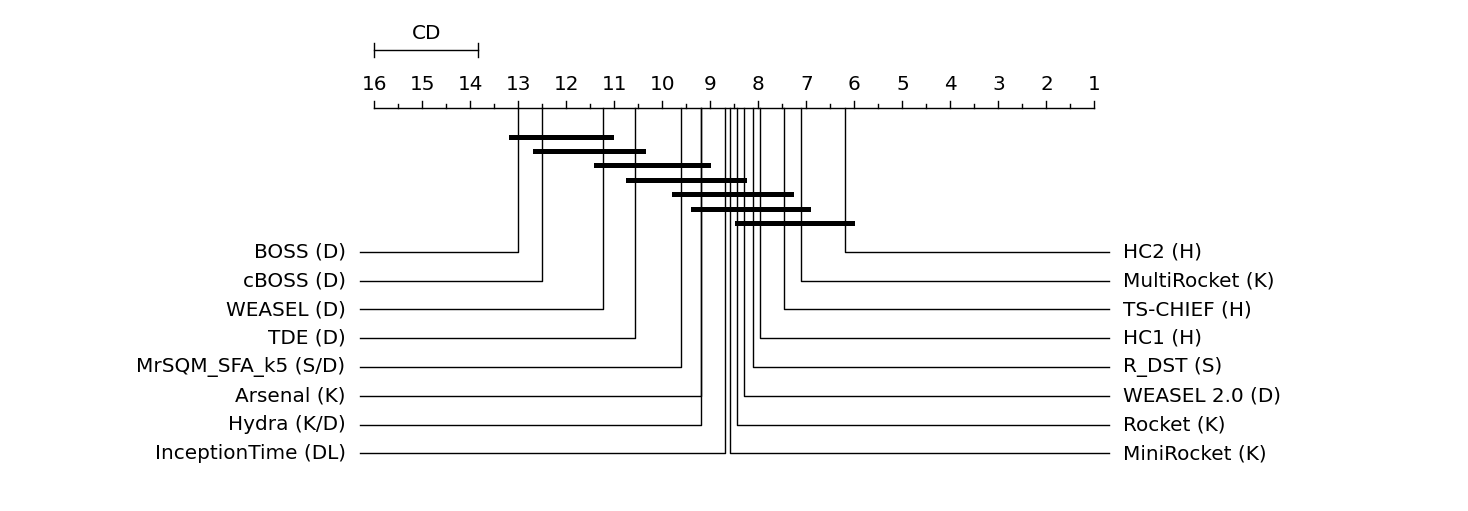

In [5]:
def critical_difference(df_subset, show=True):
    ranks = df_subset.rank(1, method = 'max', ascending=False)
    # print(ranks)
    mean_ranks = np.array(ranks.mean(axis=0))

    df_ranks = pd.DataFrame(
        list(zip(df_subset.columns.values, np.round(mean_ranks,2))), 
        columns=["Classifer", "Mean Rank"]).set_index("Classifer").T
    
    if show:
        display(df_ranks)
        for i, name in enumerate(df_subset.columns[0:]):
           print(f"{i, name}:  \t ties/wins={ranks[ranks[name] == np.min(ranks, axis=1)].shape[0], ranks[ranks[name] == 1].shape[0]}")

        print(f"Total:  \t{len(ranks)}")

    cd = Orange.evaluation.scoring.compute_CD(mean_ranks, df_subset.shape[0])

    Orange.evaluation.graph_ranks(mean_ranks, df_subset.columns.values, cd=cd, 
                                          width=10, reverse=True, textspace=2.5)
    plt.tight_layout()
    
    return df_ranks



#subset = [0,  1, 2, 3, 4, 5]
# subset = [5,9] #  6 4 2 1

subset_dicts = [0, 2, 5, 9, 11, 12, 13]
df_subset = df_pivot #.iloc[:, subset_dicts]

# df_subset = df_pivot.copy()
critical_difference(df_subset)

Classifer,R_DST (S),MultiRocket (K),MiniRocket (K),Rocket (K),Hydra (K/D),WEASEL 2.0 (D)
Mean Rank,3.76,3.26,4.14,3.94,4.41,3.88


(0, 'R_DST (S)'):  	 ties/wins=(38, 18)
(1, 'MultiRocket (K)'):  	 ties/wins=(46, 25)
(2, 'MiniRocket (K)'):  	 ties/wins=(22, 2)
(3, 'Rocket (K)'):  	 ties/wins=(31, 10)
(4, 'Hydra (K/D)'):  	 ties/wins=(29, 5)
(5, 'WEASEL 2.0 (D)'):  	 ties/wins=(38, 18)
Total:  	114


/var/folders/4l/py9g67fx10n68s69g0w8sghr0000gn/T/ipykernel_73888/2439963766.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Classifer,R_DST (S),MultiRocket (K),MiniRocket (K),Rocket (K),Hydra (K/D),WEASEL 2.0 (D)
Mean Rank,3.76,3.26,4.14,3.94,4.41,3.88


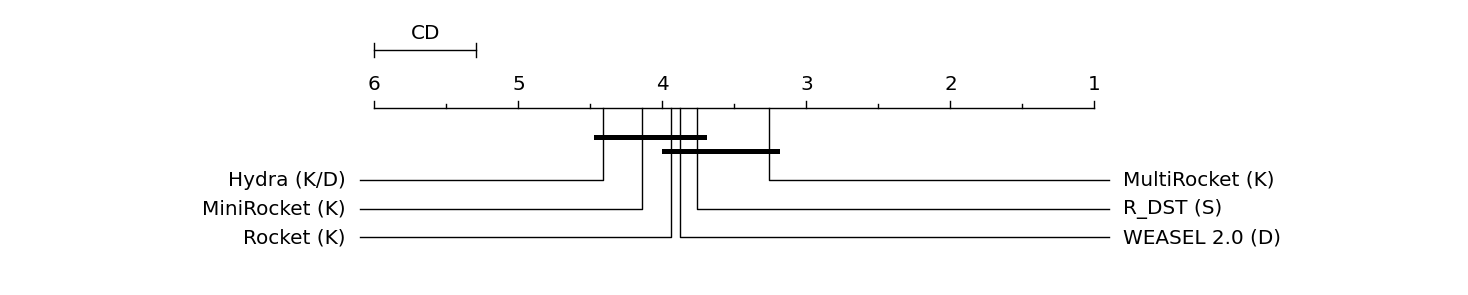

In [6]:
subset = [9, 8, 6, 10, 4, 14]
df_subset2 = df_pivot.iloc[:, subset]
critical_difference(df_subset2, True)

/var/folders/4l/py9g67fx10n68s69g0w8sghr0000gn/T/ipykernel_73888/2439963766.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Classifer,BOSS (D),Hydra (K/D),MrSQM_SFA_k5 (S/D),TDE (D),WEASEL (D),WEASEL 2.0 (D),cBOSS (D)
Mean Rank,5.52,3.54,3.81,4.29,4.69,3.25,5.35


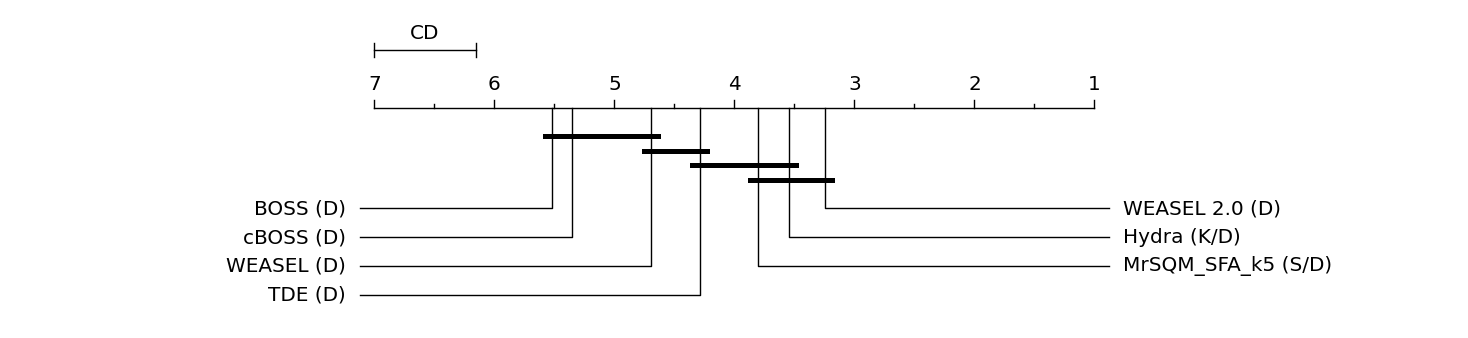

In [7]:
subset = [1, 4, 7, 11, 13, 14, 15]
df_subset2 = df_pivot.iloc[:, subset]
critical_difference(df_subset2, False)

/var/folders/4l/py9g67fx10n68s69g0w8sghr0000gn/T/ipykernel_73888/1397593894.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order=df.groupby("Classifier").median().sort_values(


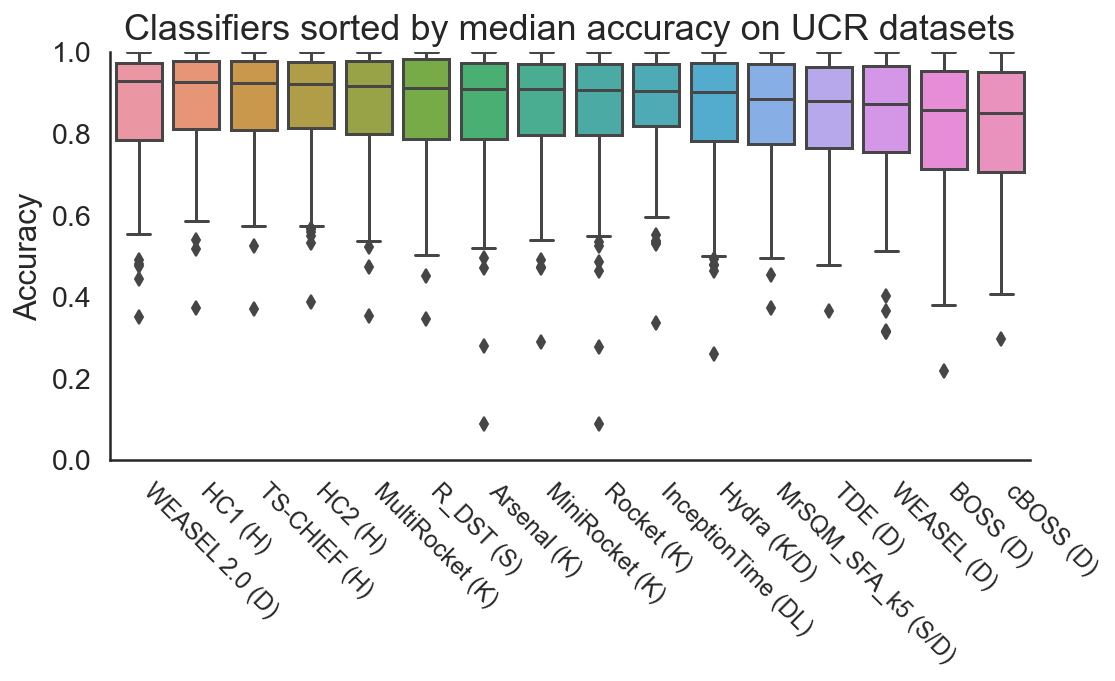

In [8]:
sns.set(font_scale=1.3)
sns.set_style("white")

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
g=sns.boxplot(y="Accuracy", 
              x="Classifier", 
              data=df, ax=ax,
              order=df.groupby("Classifier").median().sort_values(
                  by="Accuracy", ascending=False).reset_index()["Classifier"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, fontsize=12, ha='left')
ax.set_yticks(ax.get_yticks(), fontsize=12)
ax.set_xlabel("")
ax.set_ylim(0.0, 1.0)
ax.set_title("Classifiers sorted by median accuracy on UCR datasets", fontsize=18)
sns.despine()
plt.tight_layout()

In [9]:
#def color_negative_red(val):
#    color = 'red' if val < 0 else 'black'
#    return 'color: %s' % color

#subset = [14, 8]
#subset = df_pivot.iloc[:,subset].copy()
#subset["diff"] = np.int32((subset.iloc[:,1] - subset.iloc[:,0])*100)

ds_file_name = "ucr_characteristics.csv"
datasets = pd.read_csv(f"../data/{ds_file_name}")
#df_new = pd.merge(subset, datasets, how ='inner', on =['Dataset', 'Dataset'])
#df_new.style.applymap(color_negative_red)
# df_new.to_excel("diff.xls")
#display(df_new)

In [10]:
subset = [4, 6, 8, 9, 10, 14]
df_subset2 = df_pivot.iloc[:,subset].copy()
df_new = pd.merge(datasets, df_subset2, how ='inner', on =['Dataset', 'Dataset'])
# df_new = df_new.melt(id_vars=["Dataset", "Type"])
display(df_new.head())
df_new.to_csv("../data/ucr_subset_dataset_type.csv")

,Dataset,Train Size,Test Size,Length,No. of Classes,Type,Hydra (K/D),MiniRocket (K),MultiRocket (K),R_DST (S),Rocket (K),WEASEL 2.0 (D)
0,ACSF1,100,100,1460,10,DEVICE,0.8600,0.9200,0.8900,0.9300,0.8800,0.9600
1,Adiac,390,391,176,37,IMAGE,0.7801,0.8414,0.8363,0.7289,0.7877,0.8440
2,ArrowHead,36,175,251,3,IMAGE,0.8114,0.8629,0.8629,0.8571,0.8171,0.8571
3,Beef,30,30,470,5,SPECTRO,0.8667,0.8667,0.7667,0.8333,0.8333,0.8333
4,BeetleFly,20,20,512,2,IMAGE,0.9500,0.9000,0.9000,0.9500,0.9000,0.9500


In [11]:
import warnings
warnings.simplefilter("ignore", UserWarning)
# warnings.simplefilter("ignore", FutureWarning)


#ds_file_name = "ucr_characteristics.csv"
#datasets = pd.read_csv(f"../data/{ds_file_name}")
#for t in datasets.Type.unique():
#    df_new = pd.merge(df_subset.reset_index(), datasets[datasets.Type==t], how ='inner', on =['Dataset', 'Dataset'])
#    df_new = df_new.iloc[:,:df_subset.shape[1]+1].set_index("Dataset")
#    if df_new.shape[0] > 2:
#        print(t, len(df_new))
#        df_ranks = critical_difference(df_new, False)
#        plt.show()        
#        display(df_ranks)

df_rt.head()

,Classifier,Dataset,Fit-Time,Predict-Time
0,Hydra (K/D),ACSF1,5.65,5.46
1,Hydra (K/D),Adiac,1.50,1.20
2,Hydra (K/D),ArrowHead,0.21,1.08
3,Hydra (K/D),Beef,0.51,0.39
4,Hydra (K/D),BeetleFly,0.36,0.31


/var/folders/4l/py9g67fx10n68s69g0w8sghr0000gn/T/ipykernel_73888/3699755866.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order=df_rt.groupby("Classifier").median().sort_values(
/var/folders/4l/py9g67fx10n68s69g0w8sghr0000gn/T/ipykernel_73888/3699755866.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order=df_rt.groupby("Classifier").median().sort_values(
/var/folders/4l/py9g67fx10n68s69g0w8sghr0000gn/T/ipykernel_73888/3699755866.py:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either sp

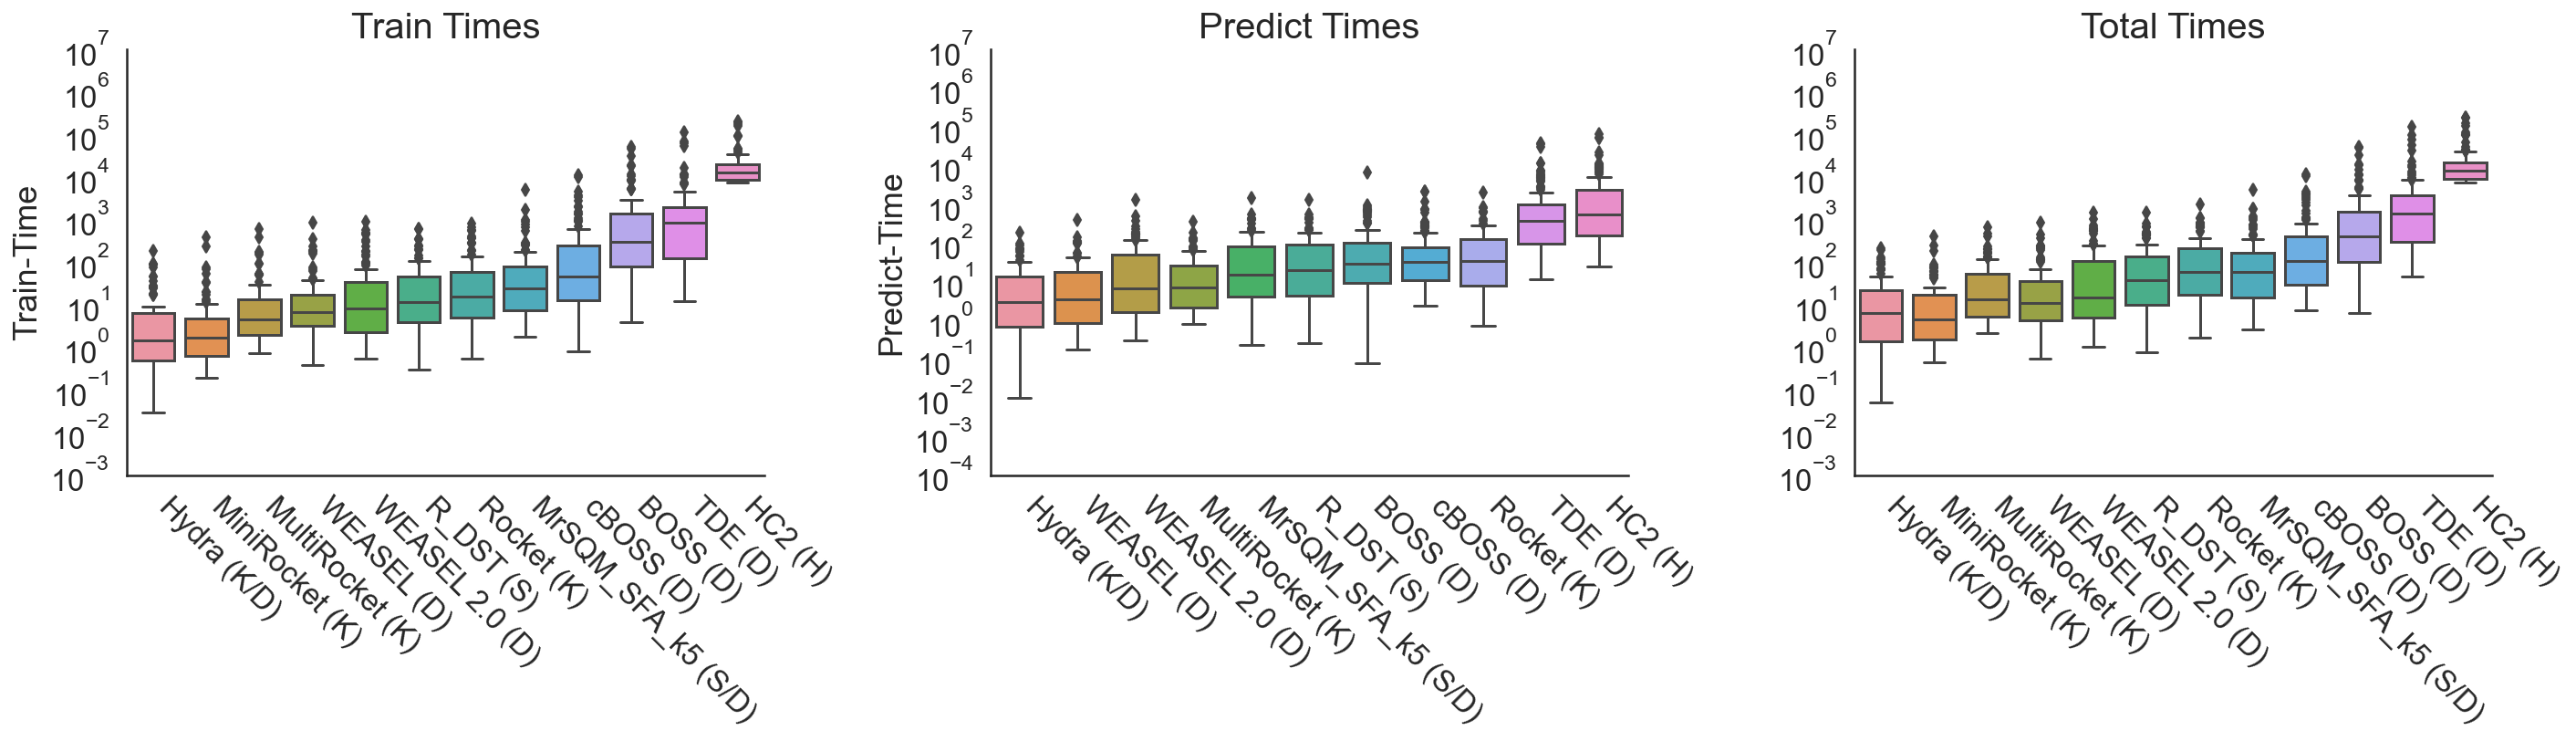

In [12]:
sns.set(font_scale=1.5)
sns.set_style("white")

df_rt.rename(columns={"Fit-Time": "Train-Time"}, inplace=True)
df_rt.dropna(inplace=True)
#df_rt = df_rt.iloc[:, subset]
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
g=sns.boxplot(y="Train-Time", x="Classifier", 
              data=df_rt.sort_values(by="Classifier"), ax=axes[0],
              order=df_rt.groupby("Classifier").median().sort_values(
                  by="Train-Time", ascending=True).reset_index()["Classifier"])
ax=axes[0]
g.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha='left')
ax.set_yticks(ax.get_yticks(),)
ax.set_xlabel("")
ax.set_title("Train Times", fontsize=20)
sns.despine()

g=sns.boxplot(y="Predict-Time", x="Classifier", 
              data=df_rt.sort_values(by="Classifier"), ax=axes[1],
              order=df_rt.groupby("Classifier").median().sort_values(
                  by="Predict-Time", ascending=True).reset_index()["Classifier"][1:])
g.set_yscale("log")
ax=axes[1]
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha='left')
ax.set_yticks(ax.get_yticks())
ax.set_xlabel("")
ax.set_title("Predict Times", fontsize=20)
sns.despine()

g=sns.boxplot(y=df_rt["Train-Time"]+df_rt["Predict-Time"], x="Classifier", 
              data=df_rt.sort_values(by="Classifier"), ax=axes[2],
              order=df_rt.groupby("Classifier").median().sort_values(
                  by="Train-Time", ascending=True).reset_index()["Classifier"])
g.set_yscale("log")
ax=axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha='left')
ax.set_yticks(ax.get_yticks())
plt.xlabel("")
plt.title("Total Times", fontsize=20)
sns.despine()
plt.tight_layout()

In [13]:
df_pivot_rt = df_rt.pivot(index="Dataset", columns=["Classifier"], values=["Train-Time", "Predict-Time"])
pd.DataFrame({'sum': (df_pivot_rt.sum() / 60 / 60)})

sum
             Classifier                    
Train-Time   BOSS (D)             83.225508
             HC2 (H)             736.995881
             Hydra (K/D)           0.295856
             MiniRocket (K)        0.337183
             MrSQM_SFA_k5 (S/D)    4.429119
             MultiRocket (K)       0.739203
             R_DST (S)             1.517344
             Rocket (K)            2.134508
             TDE (D)             134.963181
             WEASEL (D)            0.932983
             WEASEL 2.0 (D)        1.682656
             cBOSS (D)            16.028358
Predict-Time BOSS (D)              5.570014
             HC2 (H)             113.943889
             Hydra (K/D)           0.407014
             MiniRocket (K)        0.286664
             MrSQM_SFA_k5 (S/D)    2.424806
             MultiRocket (K)       0.802619
             R_DST (S)             2.452467
             Rocket (K)            3.857744
             TDE (D)              65.969569
             WEASEL (D)            0.580217
             WEASEL 2.0 (D)        1.725000
             cBOSS (D)             4.171600

In [14]:
#pd.set_option('display.max_rows', 1000)
#display(df_pivot_rt)
df_rt # .head()

,Classifier,Dataset,Train-Time,Predict-Time
0,Hydra (K/D),ACSF1,5.65,5.46
1,Hydra (K/D),Adiac,1.50,1.20
2,Hydra (K/D),ArrowHead,0.21,1.08
3,Hydra (K/D),Beef,0.51,0.39
4,Hydra (K/D),BeetleFly,0.36,0.31
...,...,...,...,...
1361,HC2 (H),StarLightCurves,47305.53,63348.05
1362,HC2 (H),FordB,156517.56,5131.98
1363,HC2 (H),FordA,175132.70,10519.09
1364,HC2 (H),Crop,197419.44,52391.40


In [15]:
# display(df[df.Classifier == "MrSQM_SFA_k5"])
# display(df_rt[df_rt.Classifier == "MrSQM_SFA_k5"])

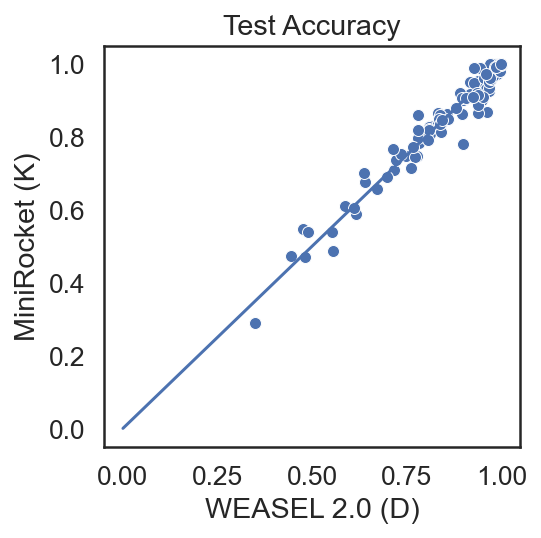

In [16]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "WEASEL 2.0 (D)"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y="MiniRocket (K)", data=df_subset)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("Test Accuracy")
plt.tight_layout()

Classifier,Hydra (K/D),WEASEL 2.0 (D)
Dataset,,
PigAirwayPressure,0.5577,0.9375


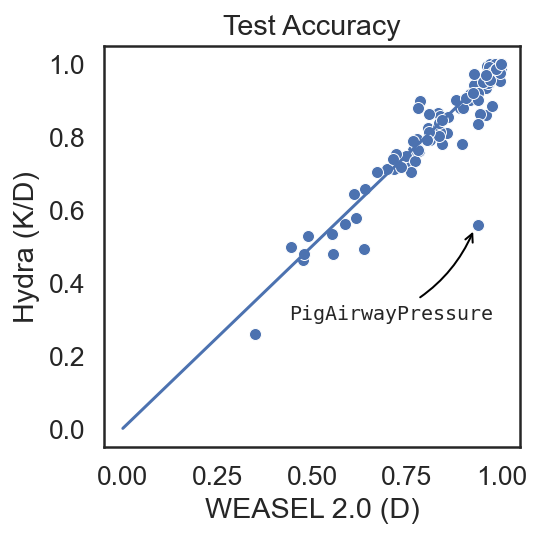

In [17]:
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y="Hydra (K/D)", data=df_subset)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))

ax.annotate('PigAirwayPressure', xy=(0.93, 0.55), xytext=(0.44, 0.3),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",
                             connectionstyle="arc3,rad=.2", color="Black"), 
             fontsize=10,fontfamily='monospace', ha='left');

ax.set_title("Test Accuracy")

display(df_subset[(abs(df_subset["Hydra (K/D)"]-df_subset["WEASEL 2.0 (D)"]))>0.2][["Hydra (K/D)", "WEASEL 2.0 (D)"]])
plt.tight_layout()

Classifier,MrSQM_SFA_k5 (S/D),WEASEL 2.0 (D)
Dataset,,


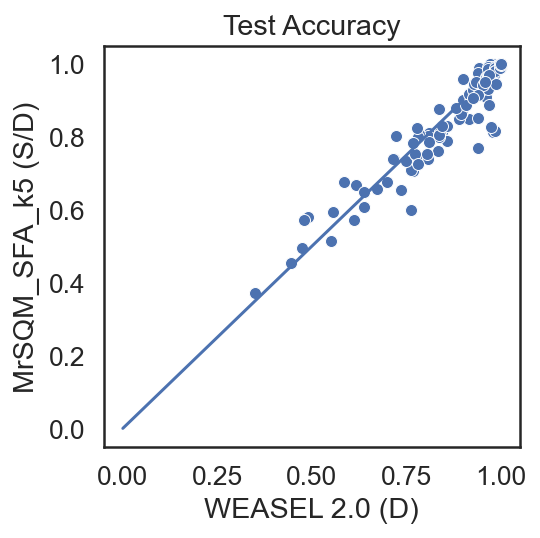

In [18]:
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y="MrSQM_SFA_k5 (S/D)", data=df_subset)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("Test Accuracy")

#ax.annotate('SonyAIBORobotSurface1', xy=(0.933, 0.67), xytext=(0.38, 0.3),
#             arrowprops=dict(facecolor='steelblue',arrowstyle="->",
#                             connectionstyle="arc3,rad=.2", color="Black"), 
#             fontsize=10,fontfamily='monospace', ha='left');


display(df_subset[(abs(df_subset["MrSQM_SFA_k5 (S/D)"]-df_subset["WEASEL 2.0 (D)"]))>0.2][["MrSQM_SFA_k5 (S/D)", "WEASEL 2.0 (D)"]])
plt.tight_layout()

Classifier,Rocket (K),WEASEL 2.0 (D)
Dataset,,
PigAirwayPressure,0.0865,0.9375


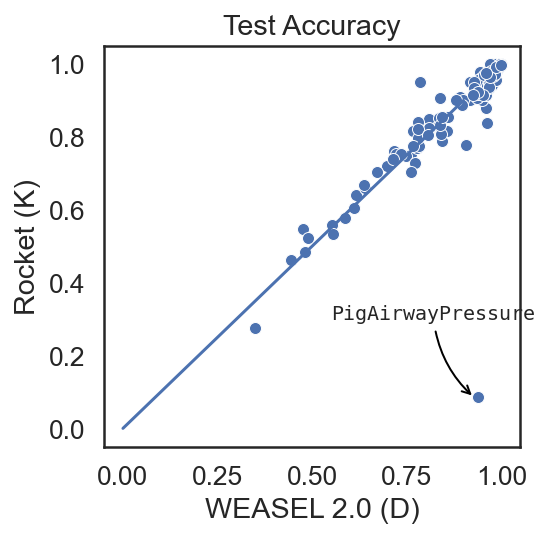

In [19]:
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y="Rocket (K)", data=df_subset)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("Test Accuracy")

ax.annotate('PigAirwayPressure', xy=(0.93, 0.083), xytext=(0.55, 0.3),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",
                             connectionstyle="arc3,rad=.2", color="Black"), 
             fontsize=10,fontfamily='monospace', ha='left');


display(df_subset[(abs(df_subset["Rocket (K)"]-df_subset["WEASEL 2.0 (D)"]))>0.2][["Rocket (K)", "WEASEL 2.0 (D)"]])
plt.tight_layout()

Classifier,Arsenal (K),BOSS (D),HC1 (H),HC2 (H),Hydra (K/D),InceptionTime (DL),MiniRocket (K),MrSQM_SFA_k5 (S/D),MultiRocket (K),R_DST (S),Rocket (K),TDE (D),TS-CHIEF (H),WEASEL (D),WEASEL 2.0 (D),cBOSS (D)
Dataset,,,,,,,,,,,,,,,,
PigAirwayPressure,0.0865,0.8894,0.9577,0.962,0.5577,0.9221,0.8654,0.9423,0.6058,0.8317,0.0865,0.9615,0.9601,0.8029,0.9375,0.9087


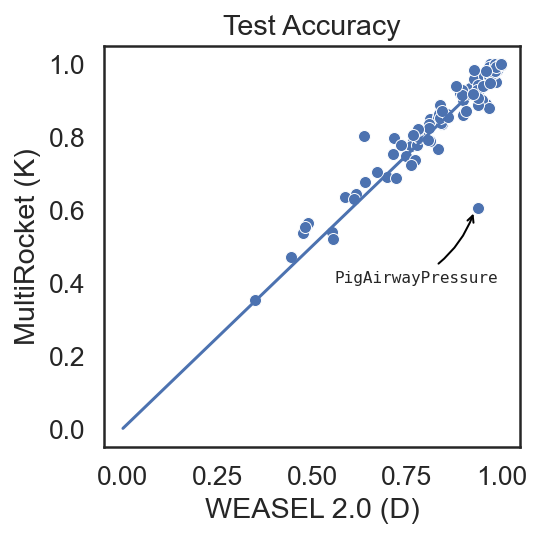

In [20]:
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y="MultiRocket (K)", data=df_subset)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("Test Accuracy")

# annotate plot
ax.annotate('PigAirwayPressure', xy=(0.93, 0.60), xytext=(0.56, 0.4),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",
                             connectionstyle="arc3,rad=.2", color="Black"), 
             fontsize=8,fontfamily='monospace', ha='left');


display(df_subset[(df_subset["MultiRocket (K)"]<0.65) & (df_subset["WEASEL 2.0 (D)"]>0.9)])
plt.tight_layout()

Classifier,WEASEL (D),WEASEL 2.0 (D)
Dataset,,
SemgHandMovementCh2,0.3133,0.6378
SemgHandSubjectCh2,0.6356,0.8956
SmoothSubspace,0.7667,0.9733


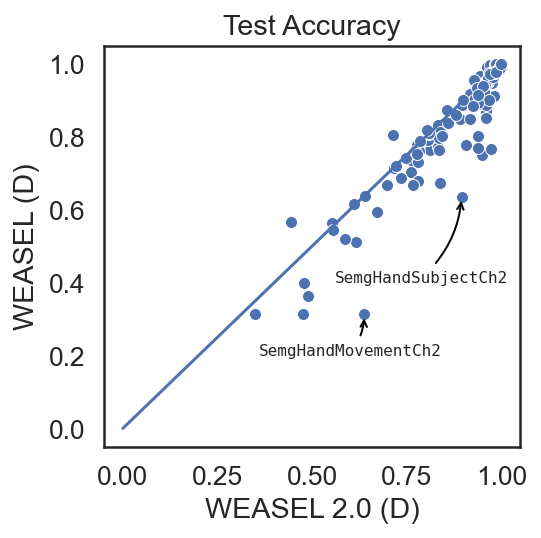

In [21]:
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y="WEASEL (D)", data=df_subset)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("Test Accuracy")

# annotate plot
ax.annotate('SemgHandMovementCh2', xy=(0.6378, 0.3133), xytext=(0.36, 0.2),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",
                             connectionstyle="arc3,rad=.2", color="Black"), 
             fontsize=8,fontfamily='monospace', ha='left');


ax.annotate('SemgHandSubjectCh2', xy=(0.8956, 0.6356), xytext=(0.56, 0.4),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",
                             connectionstyle="arc3,rad=.2", color="Black"), 
             fontsize=8,fontfamily='monospace', ha='left');


display(df_subset[(abs(df_subset["WEASEL (D)"]-df_subset["WEASEL 2.0 (D)"]))>0.2][["WEASEL (D)", "WEASEL 2.0 (D)"]])
plt.tight_layout()

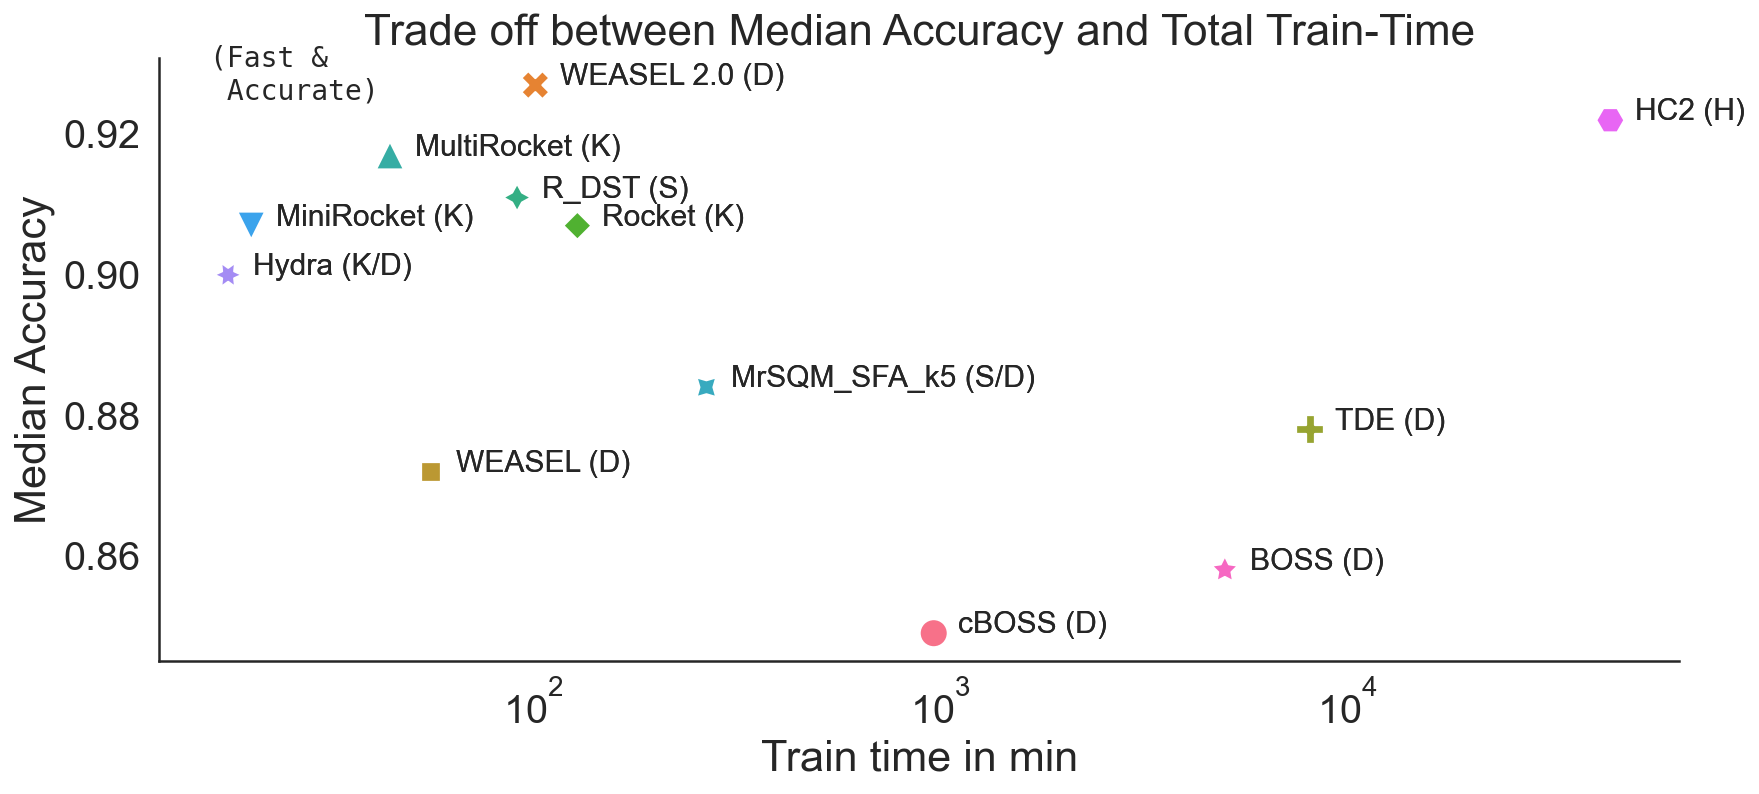

In [22]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']*1.15, point['y'], str(point['val']), fontsize=15)
        
sns.set(font_scale=1.8)
sns.set_style("white")

df_all = pd.DataFrame(columns=["Classifier", "Train time in min", "Acc"])
df = df_pivot_rt["Train-Time"]
for name in df_pivot_rt.columns[0:]:
    if name[1] in df_pivot:
        acc = np.round(df_pivot[name[1]].median(), 3)
        # print(name[1], acc)
        if name[1] in df:
            fit = np.round(df[name[1]].sum(), 3) / 60
            df_all.loc[-1] = [name[1], fit, acc]
            df_all.index = df_all.index + 1
df_all.sort_index(inplace=True)

# fig = plt.figure(figsize=(5, 5))
g = sns.relplot(x="Train time in min", y = "Acc", 
                kind="scatter", aspect=1.5, height=6,
                data=df_all, hue="Classifier", 
                style="Classifier", s=200)
g.ax.set_xscale("log")
g.ax.set_ylabel("Median Accuracy")

# add title
g.ax.set_title("Trade off between Median Accuracy and Total Train-Time", fontsize=22)

# annotate plot
g.ax.annotate('(Fast & \n Accurate)', xy=(16, 0.93), xytext=(16, 0.925),
             fontsize=14,fontfamily='monospace', ha='left');

label_point(df_all["Train time in min"], df_all["Acc"], df_all["Classifier"], plt.gca())  
g._legend.remove()
plt.tight_layout()

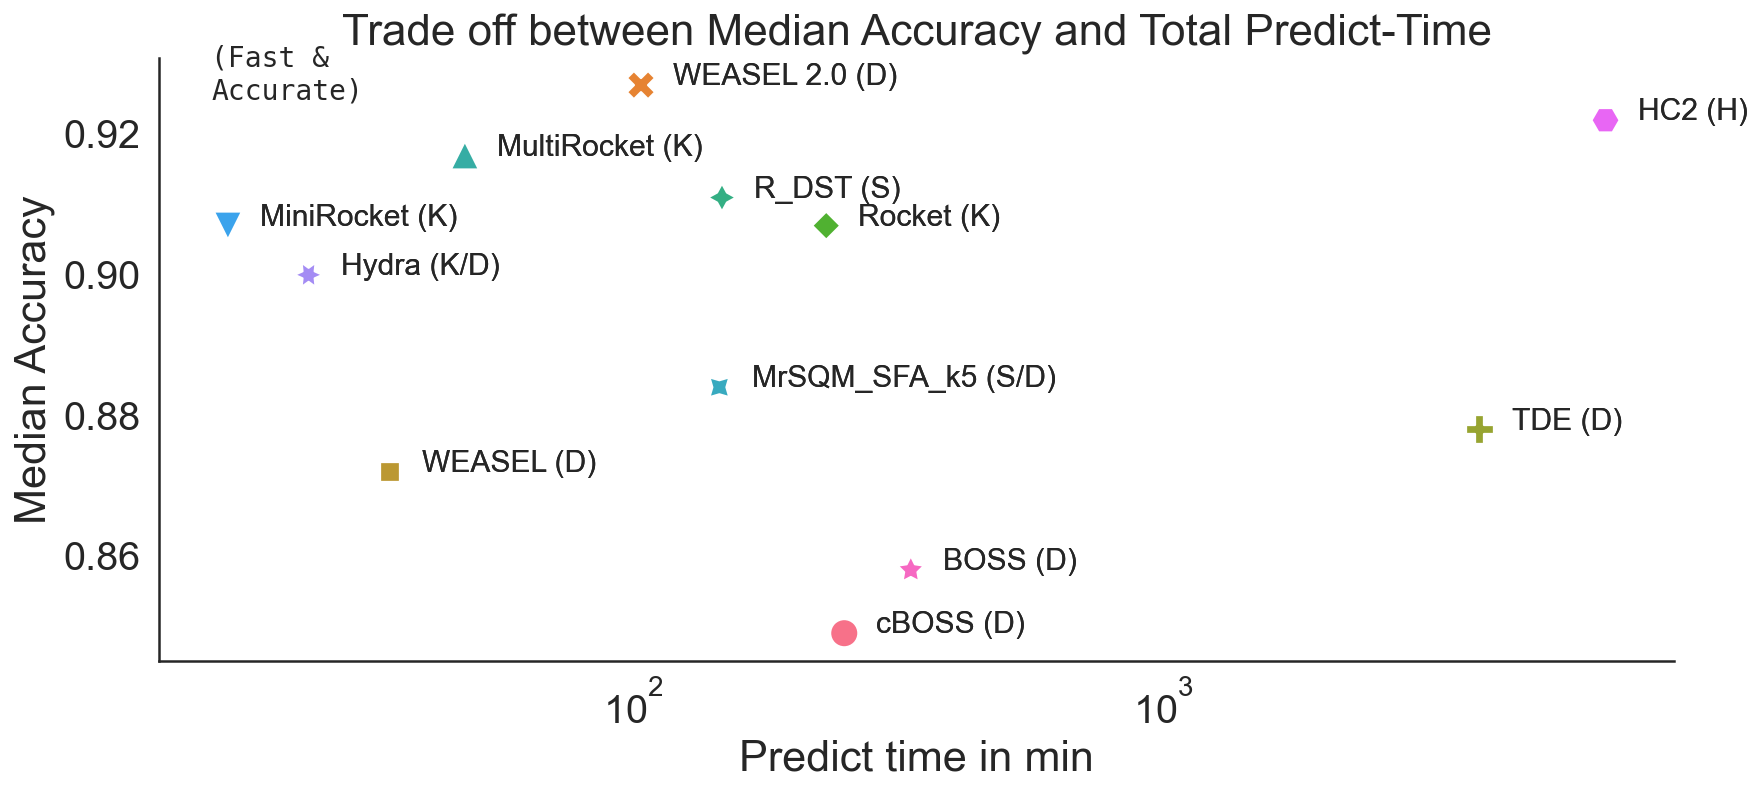

In [23]:
sns.set(font_scale=1.8)
sns.set_style("white")

df_all = pd.DataFrame(columns=["Classifier", "Predict time in min", "Acc"])
df = df_pivot_rt["Predict-Time"]
for name in df_pivot_rt.columns[0:]:
    if name[1] in df_pivot:
        acc = np.round(df_pivot[name[1]].median(), 3)
        if name[1] in df:
            fit = np.round(df[name[1]].sum(), 3) / 60
            df_all.loc[-1] = [name[1], fit, acc]
            df_all.index = df_all.index + 1
df_all.sort_index(inplace=True)
df_all = df_all[df_all["Predict time in min"] > 0]

g = sns.relplot(x="Predict time in min", y = "Acc", 
                data=df_all, hue="Classifier", aspect=1.5, height=6,
                style="Classifier", s=200)
g.ax.set_xscale("log")
g.ax.set_ylabel("Median Accuracy")

# add title
g.ax.set_title("Trade off between Median Accuracy and Total Predict-Time", fontsize=22)

# annotate plot
g.ax.annotate('(Fast & \nAccurate)', xy=(16, 0.93), xytext=(16, 0.925),
             fontsize=14,fontfamily='monospace', ha='left');

g._legend.remove()
label_point(df_all["Predict time in min"], df_all["Acc"], df_all["Classifier"], g.ax)

plt.tight_layout()

## Memory

In [24]:
file_name = "ucr_feature_space.csv"
df_memory = pd.read_csv(f"../data/{file_name}")
df_memory.head()

,Classifier,Dataset,Accuracy,Fit,Predict,Features,Cross-Val
0,Hydra,ArrowHead,0.811,0.20,1.05,5120,NaN
1,Hydra,Adiac,0.818,1.75,1.49,5120,NaN
2,MultiRocket,Beef,0.767,1.91,1.47,49728,NaN
3,MiniRocket,ArrowHead,0.863,0.47,1.26,9996,NaN
4,MiniRocket,Adiac,0.841,2.46,1.81,9996,NaN


In [25]:
# df_memory.set_index("Classifier").loc[["Rocket"]]

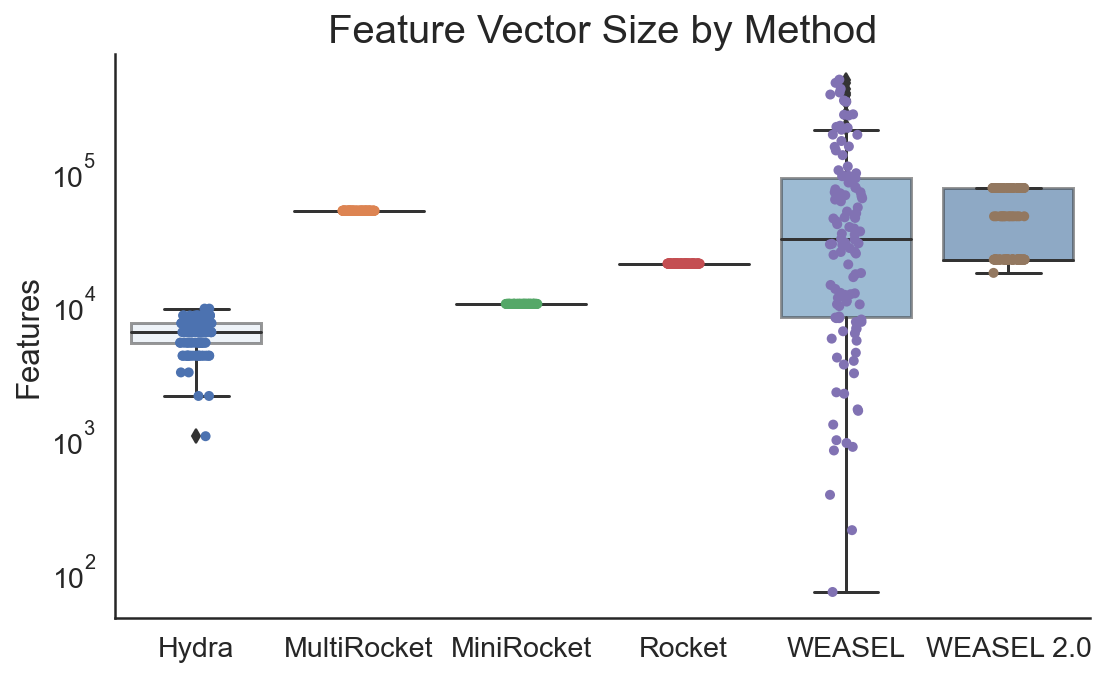

In [26]:
sns.set(font_scale=1.3)
sns.set_style("white")

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax=sns.boxplot(y="Features", 
              x="Classifier", boxprops=dict(alpha=.5), palette="Blues",
              data=df_memory, ax=ax)

sns.stripplot(y="Features", 
              x="Classifier", 
              data=df_memory, 
              ax=ax)

#ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
#ax.set_yticks(ax.get_yticks(), fontsize=14)
#ax.set_xticks(ax.get_xticks(), fontsize=14)
ax.set_xlabel("")
ax.set_yscale("log")
ax.set_title("Feature Vector Size by Method", fontsize=20)
sns.despine()

plt.tight_layout()

In [27]:
df_memory.set_index("Classifier").loc[["WEASEL 2.0"]].describe()

,Accuracy,Fit,Predict,Features,Cross-Val
count,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.863219,72.171228,74.608246,41705.052632,-0.215564
std,0.144345,167.911338,197.243697,23878.004263,0.167710
min,0.348000,0.330000,0.230000,17056.000000,-0.939184
25%,0.786000,2.275000,2.412500,21448.000000,-0.306087
50%,0.926500,13.810000,9.745000,21448.000000,-0.185489
75%,0.971250,55.402500,66.792500,73584.000000,-0.079052
max,1.000000,1143.540000,1850.290000,73584.000000,-0.006319
